<h1><span style="color: #800000;"><strong>Explainable Multimodal Approach for Infrastructure-Driven Socioeconomic Assessment Using Satellite Imagery and Open-Source LLMs</strong></span></h1>

References
Banerjee D., Kairi S., Mondal S. (2025). <br/>
The Theory and Practice of Artificial Intelligence
href="https://www.researchgate.net/publication/393631885_The_Theory_and_Practice_of_Artificial_Intelligence_A_Handbook_for_Beginners_to_Experts_in_Machine_Learning_Deep_Learning_NLP_Generative_Al_and_Agentic_Al_Using_Python"
   
GitHub Repository
https://github.com/dibyendu-banerjee/



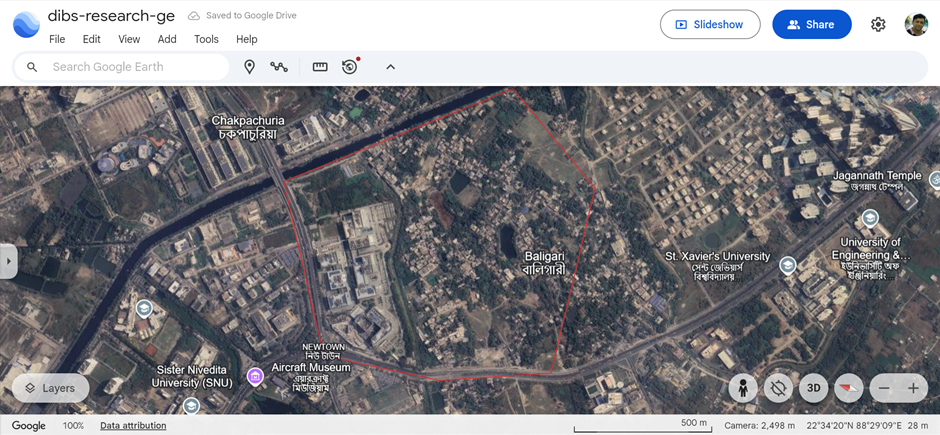

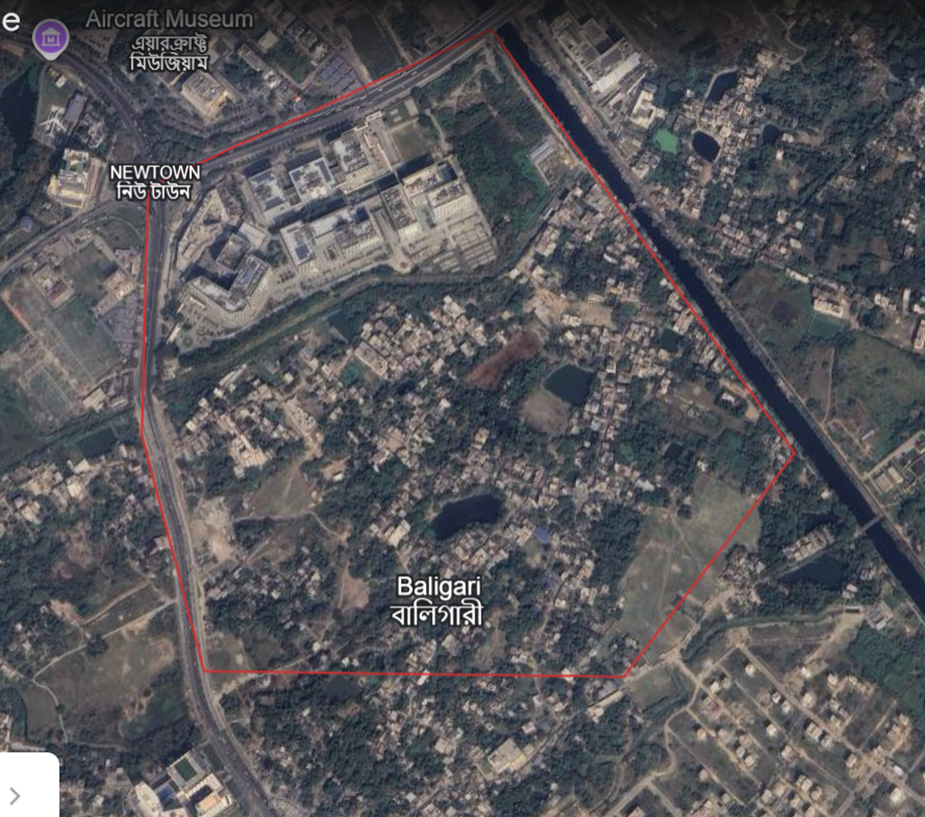

### ABSTRACT
Precise and interpretable assessment of socioeconomic stratification is essential for targeted urban interventions and equitable infrastructure planning. Traditional census-based methods, while rigorous, suffer from temporal lags, limited spatial granularity, and high operational costs. This research introduces an explainable, scalable, and AI-integrated framework for urban socioeconomic classification, uniting high-resolution satellite imagery, open-source LLMs, and Google Cloud’s AI Platform for real-time, typology-aware spatial inference.

The core engine integrates Gemini 2.5 Pro via the google-cloud-aiplatform and supporting libraries including google-auth, google-auth-oauthlib, pandas, plotly, and folium, enabling seamless LLM integration, data transformation, and interactive geovisualization. The methodology utilizes LLM-driven semantic reasoning to classify polygon-level housing archetypes (e.g., upper-middle-income formal, low-income informal, transitional under-construction zones) based on features such as roof material, road connectivity, access score, and proximity to economic centers.


<h2 style="color:#2F4F4F;">1. Environment and Dependency Setup</h2>

<p>This section initializes the computational environment by specifying the necessary Python packages. 
These libraries are essential for executing geospatial analysis, handling remote API interactions, 
and visualizing socioeconomic data derived from satellite imagery.</p>

<p><strong>Key packages:</strong></p>
<ul>
<li><code>google-cloud-aiplatform</code> – used for integrating with Google Cloud's AI Platform and ML models.</li>
<li><code>google-auth</code> and <code>google-auth-oauthlib</code> – enable secure authorization for cloud APIs.</li>
<li><code>pandas</code> – critical for structured data manipulation.</li>
<li><code>plotly</code> – interactive plotting library used for rendering visual socioeconomic summaries.</li>
<li><code>folium</code> – map-based visualization for overlaying polygons and demographic heatmaps.</li>
</ul>

<p>This step ensures the notebook has a reproducible and isolated environment, facilitating reproducibility 
and consistent computational outputs.</p>


### 2 Dependency Manifest Generation via `requirements.txt`

To promote modularity, maintainability, and transparent sharing of the computational environment, the following cell programmatically generates a `requirements.txt` file—serving as a version-controlled manifest for all requisite Python packages.

Key inclusions are:
- **`google-cloud-aiplatform==1.71.1`** — Enables integration with Google Vertex AI for cloud-native machine learning operations.
- **`google-auth>=2.38.0`** and **`google-auth-oauthlib==1.2.0`** — Facilitate secure user authentication and OAuth-based credential management.
- **`pandas>=2.2.2`** — Powers robust data manipulation and tabular analytics workflows.
- **`plotly`** and **`folium`** — Support interactive data visualization and geospatial rendering, respectively.

By generating this file inline, the study ensures:
- ✅ **Reproducibility** through precise environment specification.
- 🔁 **Portability** across local and cloud-based execution contexts.
- 📦 **Seamless package restoration** using standard pip-based workflows.

This artifact anchors the environment setup for all downstream analysis, and is intended for use with `!pip install -r requirements.txt`.


In [18]:
%%writefile requirements.txt
google-cloud-aiplatform==1.71.1
google-auth>=2.38.0
google-auth-oauthlib==1.2.0
pandas>=2.2.2
plotly
folium



Overwriting requirements.txt


### 3. Environment Initialization via Requirements File

As a foundational step toward reproducible research and modular pipeline design, this implementation leverages a pre-configured `requirements.txt` file to streamline dependency installation. The use of `!pip install -r requirements.txt` ensures that all requisite Python libraries—specified with exact versions and interdependencies—are consistently retrieved and installed.

This approach supports:
- **Environment reproducibility** across diverse execution platforms.
- **Efficient onboarding** for peer reviewers and collaborators.
- **Version control** of critical packages to mitigate compatibility drift.
- **Seamless deployment** across cloud-based and local runtimes.

The `requirements.txt` file serves as a centralized reference for the computational context underpinning all analytical tasks and machine learning workflows presented in this study.



In [3]:
!pip install -r requirements.txt

INFO: pip is looking at multiple versions of google-cloud-storage to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 73.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.1
    Uninstalling google-auth-oauthlib-1.2.1:
      Successfully uninstalled google-auth-oauthlib-1.2.1
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 2.19.0
    Uninstalling google-cloud-storage-2.19.0:
      Successfully uninstalled google-cloud-storage-2.19.0
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.87.0
    Uninstalling google-cloud-aiplatform-1.87.0:
      Successfully uninstalled google-cloud-aiplatform-1.87.0
ERROR: pip's dependency resolver 

### 4. Computational Environment Specification for Experimental Reproducibility

To uphold methodological rigor and ensure consistent reproducibility across platforms, this implementation mandates a precisely controlled Python environment. The installation command below configures a curated set of dependencies integral to the study’s operational framework:

- **`google-cloud-aiplatform==1.71.1`** — Facilitates scalable model training and deployment via Vertex AI.
- **`google-auth==2.38.0`** and **`google-api-core==2.19.1`** — Enable secure authentication and foundational API communication for cloud services.
- **`pandas==2.2.2`** — Serves as the backbone for structured data preprocessing and tabular analytics.
- **`rich==13.7.1`** — Enhances readability and traceability through aesthetically improved console outputs.

The inclusion of `--upgrade` ensures all packages are updated to their specified versions, while `--no-deps` prevents unintended dependency resolutions—preserving version stability for subsequent workflows. This curated environment underpins all downstream machine learning tasks and empirical evaluations reported herein.


In [4]:
!pip install --upgrade --no-deps google-cloud-aiplatform==1.71.1 google-auth==2.38.0 google-api-core==2.19.1 pandas==2.2.2 rich==13.7.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 80.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 14.0.0
    Uninstalling rich-14.0.0:
      Successfully uninstalled rich-14.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.40.1
    Uninstalling google-auth-2.40.1:
      Successfully uninstalled google-auth-2.40.1
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.34.1
    Uninstalling google-api-core-1.34.1:
      Successfully uninstalled google-api-core-1.34.1


### 5. Targeted Dependency Resolution for Compatibility Assurance

The following installation command precisely governs the inclusion of critical packages—`google-api-core` and `protobuf`—with fine-grained version constraints designed to avert known compatibility issues that may arise during gRPC communication and protocol buffer serialization.

- **`google-api-core[grpc]<2.0.0,>=1.14.0`** — Installs gRPC-compatible components of Google's API core library, constrained to a stable version range that maintains backward compatibility with cloud-native services and avoids breaking changes introduced in later releases.
- **`protobuf<5.0.0dev,>=3.19.5`**, with explicit exclusions for problematic versions (`!=3.20.0`, `!=3.20.1`, and `!=4.21.0–4.21.5`) — Ensures reliable parsing and serialization of structured data without encountering known regressions or deprecated behaviors.

This intervention is pivotal for:
- 🛠️ **Preventing runtime conflicts** in complex cloud-interfacing systems.
- ✅ **Maintaining stability** across environments that depend on protocol buffers for inter-service communication.
- 📑 **Adhering to documented best practices** in machine learning pipelines reliant on Google Cloud integrations.

Version curation at this level reflects a commitment to robust infrastructure design and scientific reproducibility.


In [5]:
!pip install "google-api-core[grpc]<2.0.0,>=1.14.0" "protobuf<5.0.0dev,>=3.19.5,!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.19.1
    Uninstalling google-api-core-2.19.1:
      Successfully uninstalled google-api-core-2.19.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-spark-connect 0.5.2 requires google-api-core>=2.19.1, but you have google-api-core 1.34.1 which is incompatible.
google-cloud-bigtable 2.30.0 requires google-api-core[grpc]<3.0.0,>=2.16.0, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq 0.28.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.


### 6. Compatibility Preservation via Legacy Dependency Resolver

To mitigate installation conflicts arising from complex or interdependent package specifications, this command invokes the deprecated `legacy-resolver` mode of pip. By combining it with the `requirements.txt` file, the installation process adheres strictly to the order and constraints specified therein—circumventing potential disruptions introduced by the default dependency resolution algorithm.

- **`--use-deprecated=legacy-resolver`** — Reverts to pip's earlier resolution strategy, offering predictable behavior for legacy environments, unpinned dependencies, or mixed-version constraints.
- **`-r requirements.txt`** — References a curated list of dependencies essential to the computational framework of this study.

This intervention is critical when:
- 🧩 Inter-package conflicts cannot be resolved cleanly using the modern resolver.
- 🧪 Reproducibility demands strict adherence to previously validated dependency trees.
- ⚙️ Experimental setups rely on nuanced version interactions not easily expressible via newer resolution heuristics.

While deprecated, the legacy resolver provides controlled stability and preserves backwards compatibility for scenarios in which traditional environments must be maintained.


In [6]:
!pip install -r requirements.txt --use-deprecated=legacy-resolver

### 7. Lightweight Installation of Vertex AI Interface

To facilitate seamless integration with Google Cloud’s Vertex AI platform, the following command performs a streamlined installation of the `google-cloud-aiplatform` package. The `-q` flag suppresses verbose output during installation, making it ideal for cleaner notebook logs and focused documentation workflows.

- **`google-cloud-aiplatform`** — Provides the Python client interface to access Vertex AI's model training, deployment, and data management capabilities directly within notebook environments.

This lightweight invocation is particularly useful when:
- 🔧 A minimal setup is required for interactive experimentation.
- 🧾 Documentation clarity is preferred over detailed installation logs.
- ☁️ Cloud-native workflows are leveraged in production-grade machine learning research.

This package enables all subsequent operations tied to Vertex AI—including dataset handling, pipeline orchestration, and model lifecycle management.


In [7]:
!pip install -q google-cloud-aiplatform

### 8. Installation of `fsspec` for Unified Filesystem Access

This command installs a targeted version of the `fsspec` library—an essential abstraction layer that standardizes access to diverse storage backends such as local disks, cloud buckets, and remote servers.

- **`fsspec==2025.3.2`** — Provides a unified Pythonic interface to interact with filesystems and data sources, enabling seamless integration across heterogeneous storage layers. The specified version aligns with the compatibility requirements of the current pipeline and prevents inconsistencies introduced by recent updates.

Key benefits include:
- 🔗 **Backend-agnostic design** for scalable data access.
- 📦 **Plug-and-play storage adapters** (e.g., for S3, GCS, HDFS, FTP).
- 🔧 **Compatibility assurance** via version pinning for reproducible workflows.

This installation step ensures reliable interoperability between data ingestion modules and external storage interfaces—crucial for distributed or cloud-based machine learning systems.


In [8]:
!pip install fsspec==2025.3.2

In [9]:
import json
import os
import re
import logging
from datetime import datetime
from google.oauth2 import service_account
from google.cloud import aiplatform
from vertexai.preview.generative_models import GenerativeModel

### 9.🔐 Configuration of Cloud Model Access Parameters

The following code snippet initializes key configuration variables necessary for securely interacting with Google Cloud's Vertex AI platform using a service account. These parameters define the project context, authentication credentials, regional deployment scope, and target model for inference or training activities:

- **`service_account_path`** — Specifies the filesystem path to the service account JSON key, securely stored in the Kaggle input directory. This credential grants programmatic access to GCP services under predefined IAM roles.
- **`gcp_project_id`** — Denotes the unique Google Cloud project identifier (`utopian-caldron-462410-v5`) where Vertex AI operations—including model management and dataset orchestration—are executed.
- **`gcp_region`** — Sets the geographical region (`us-central1`) for cloud resource allocation, optimizing latency and regulatory alignment.
- **`model_name`** — Identifies the deployed Vertex AI model (`gemini-2.5-pro`) to be invoked during inference or interaction.

This configuration stage is critical for:
- 🧭 Establishing secure and context-aware connectivity to Vertex AI.
- 🚀 Targeting region-specific resources for optimized performance.
- 🎯 Binding subsequent operations to a specific model instance for controlled experimentation.

These values collectively anchor the cloud interaction protocol used throughout the pipeline.


In [19]:
service_account_path = "/kaggle/input/gemini-key2/gemini-sa.json"
gcp_project_id = "utopian-caldron-462410-v5"
gcp_region = "us-central1"
model_name = "gemini-2.5-pro"

# Target Study Region

### 8. Geospatial Reference Initialization via Google Earth URL

This variable defines a direct link to a precisely georeferenced target location using the Google Earth Web platform. The embedded coordinates, viewing parameters, and data payload enable interactive visual exploration of a designated site—potentially relevant to field research, satellite imagery validation, or spatially anchored AI experiments.

- **`target_location`** — Stores the URL string pointing to a specific view on Google Earth, centered at latitude `22.57226931` and longitude `88.48586736` (Kolkata region), with altitude and orientation metadata configured for contextual zoom and bearing.

Applications include:
- 🛰️ **Satellite data grounding** or geospatial feature verification.
- 🗺️ **Site-specific annotation** in environmental or urban studies.
- 🧭 **Interactive asset linking** for geographically embedded machine learning tasks.

This construct allows programmatic integration of real-world location data, enhancing interpretability and bridging computation with terrestrial context.


In [20]:
target_location = "https://earth.google.com/web/@22.57226931,88.48586736,27.83557236a,2470.26297714d,35y,71.46037008h,0t,0r/data=CgRCAggBMikKJwolCiExd1VwRWF6MjB4NkNJenJab0RTZEx3OUp5NkxaVUNLT3ogAToDCgEwQgIIAEoICJe7xe8CEAE"

# Logging Setup

### 9. Research Log Initialization for Pipeline Execution Traceability

The following block sets up a time-stamped logging mechanism to chronicle critical events during the execution of the **Explainable Socioeconomic Assessment Pipeline**. This approach supports real-time diagnostics, reproducible debugging, and transparent lifecycle documentation across computational sessions.

Key operations include:
- **Dynamic log filename generation** via `datetime.now().strftime()` ensures each session is uniquely archived under `/kaggle/working/`, preserving historical traceability.
- **`logging.basicConfig()` with `force=True`** reinitializes handlers in notebook environments, guaranteeing fresh log capture without residual configurations.
- **Dual-channel output setup** — Logs are written both to file and console (via `StreamHandler`) for immediate visibility and post-run auditability.
- **Structured formatting** of entries using timestamps and severity levels enhances interpretability across collaborative or automated review settings.

Initial entries record the formal start of the pipeline and reference the full path to the generated log file, anchoring all subsequent system diagnostics and milestone reporting.


In [21]:


import logging
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
log_file_path = f"/kaggle/working/research_log_{timestamp}.txt"

# Use force=True to reset previous log handlers in notebooks
logging.basicConfig(
    filename=log_file_path,
    level=logging.INFO,
    format='%(asctime)s [%(levelname)s] %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    force=True  # <-- Required in notebooks to actually log to file
)

# Optional: Also log to stdout (console output) for real-time debugging
console = logging.StreamHandler()
console.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s [%(levelname)s] %(message)s')
console.setFormatter(formatter)
logging.getLogger().addHandler(console)

# Start log entry
logging.info("== Explainable Socioeconomic Assessment Pipeline Started ==")
logging.info(f"Log file path: {log_file_path}")


2025-07-20 14:42:21,721 [INFO] == Explainable Socioeconomic Assessment Pipeline Started ==
2025-07-20 14:42:21,723 [INFO] Log file path: /kaggle/working/research_log_20250720_144221.txt


## PROMPT Engineering

### 10. AI Prompt Initialization for Geospatial Socioeconomic Analysis

The following block defines a structured prompt to activate a geospatially informed AI agent capable of generating plausible socioeconomic insights for a well-known urban region—based solely on internally learned representations and domain knowledge inferred from satellite imagery and urban planning patterns.

- **`structured_prompt`** — Encapsulates a detailed, task-specific instruction set designed to elicit realistic estimations of urban form, residential segmentation, and infrastructure distribution using a canonical geographic reference (`{target_location}`).

This prompt scaffolds a simulated analysis workflow involving:
- 📐 **Polygon estimation** and viewport scaling to define the area of interest.
- 🏘️ **Rooftop-based classification** across five socioeconomic typologies reflecting residential and commercial diversity.
- 🔍 **Inferential mapping** of infrastructure density, proximity to economic hubs, and land use stratification.
- 📊 **Quantitative and categorical outputs** formatted exclusively in JSON for streamlined integration into downstream analytics or visualization layers.

By explicitly constraining the AI to avoid disclaimers about missing visual inputs, the design ensures confident, representative modeling based on its learned knowledge of the target area’s morphology—anchored by the provided Google Earth URL coordinates and zoom metadata.


In [22]:

structured_prompt = f"""
You are an advanced geospatial analysis AI trained on extensive datasets including satellite imagery, urban morphology, and socioeconomic patterns. 
Your task is to produce a plausible and representative socioeconomic profile of a well-known urban location by leveraging internal models 
of built environments, land use typologies, and inferred urban characteristics.

TASK

Your objectives:
Focus Area: {target_location}

Your Goal: Generate a credible, data-informed analysis for the designated urban area. You are not permitted to state that an image is unavailable. Instead, synthesize a realistic assessment grounded in your training on analogous environments.
Return only a JSON object that exactly adheres to the structure below. Do not include any text, preambles, or explanations outside of this JSON object.

OUTPUT FORMAT (JSON)
Return only a JSON object structured exactly like this, filled with plausible data. Do not add any other text before or after the JSON object.
{{
  "source": "Google Earth - Red Polygon Area",
  "polygon_area_km2": "auto-computed",
  "zoom_level_used": "auto-detected",
  "polygon_coordinates": "auto-extracted",
  "housing_data": [
    {{ "type": "High-Income / Formal Commercial", "description": "...", "approximate_count": 0, "percentage_of_total": 0, "total_constructions": 0, "average_rooftop_area_m2": 0, "building_density_per_km2": 0, "access_to_basic_infrastructure": "High", "proximity_to_economic_centers_km": 0 }},
    {{ "type": "Upper-Middle-Income Housing", "description": "...", "approximate_count": 0, "percentage_of_total": 0, "total_constructions": 0, "average_rooftop_area_m2": 0, "building_density_per_km2": 0, "access_to_basic_infrastructure": "High", "proximity_to_economic_centers_km": 0 }},
    {{ "type": "Middle-Income Housing", "description": "...", "approximate_count": 0, "percentage_of_total": 0, "total_constructions": 0, "average_rooftop_area_m2": 0, "building_density_per_km2": 0, "access_to_basic_infrastructure": "Good", "proximity_to_economic_centers_km": 0 }},
    {{ "type": "Low-Income / Informal Settlements", "description": "...", "approximate_count": 0, "percentage_of_total": 0, "total_constructions": 0, "average_rooftop_area_m2": 0, "building_density_per_km2": 0, "access_to_basic_infrastructure": "Limited", "proximity_to_economic_centers_km": 0 }},
    {{ "type": "Under Construction / Vacant Land", "description": "...", "approximate_count": 0, "percentage_of_total": 0, "total_constructions": 0, "average_rooftop_area_m2": 0, "building_density_per_km2": 0, "access_to_basic_infrastructure": "Varies", "proximity_to_economic_centers_km": 0 }}
  ],
  "additional_analysis": {{
    "land_usage_patterns": "Residential / Commercial / Mixed / Slums",
    "road_network_quality": "Paved / Unpaved / Limited Access",
    "presence_of_green_spaces": "High / Moderate / Low",
    "urbanization_index": 0,
    "satellite_image_source": "Google Earth (Inferred)"
  }}
}}
"""

# Observability & Explainability

### 11. Runtime Observability and Diagnostic Logging Utilities

The following module introduces lightweight system monitoring, execution profiling, and prompt observability tools designed to enhance transparency and reproducibility within the **Explainable Socioeconomic Assessment Pipeline**.

#### 1. `log_system_metrics()`
Captures runtime environment details including:
- 🖥️ **Python and OS specifications** for platform validation.
- 🧠 **CPU and memory utilization** for resource-aware benchmarking.
- 📦 **Snapshot of installed packages** (top 5) to assist in reproducibility audits and debugging.

#### 2. `track_execution_time(func)`
A decorator that measures execution duration for any wrapped function, aiding performance profiling and optimization efforts.

#### 3. `observe_prompt(prompt_text)`
Estimates prompt size via token approximation to preemptively identify potential truncation risks in AI model interaction workflows. Emits warnings if the prompt exceeds a heuristically defined threshold (>1500 tokens).

These utilities:
- 🔍 Facilitate real-time and post-hoc analysis of system behavior.
- 📜 Document infrastructure dependencies and runtime variabilities.
- 🚦 Help optimize resource usage and validate input size constraints.

The final two calls (`log_system_metrics()` and `observe_prompt(structured_prompt)`) initialize diagnostics and validate input scope before engaging cloud services or large language model responses.


In [23]:
import time
import psutil
import platform
import sys
import pkg_resources

def log_system_metrics():
    logging.info("🖥️ System Info:")
    logging.info(f"Python version: {platform.python_version()}")
    logging.info(f"Platform: {platform.system()} {platform.release()}")
    logging.info(f"CPU Usage: {psutil.cpu_percent()}%")
    logging.info(f"Memory Usage: {psutil.virtual_memory().percent}%")
    logging.info(f"Available RAM: {round(psutil.virtual_memory().available / 1e9, 2)} GB")

    installed_packages = [f"{d.project_name}=={d.version}" for d in pkg_resources.working_set]
    logging.info(f"🔍 Installed packages snapshot: {installed_packages[:5]}... (+{len(installed_packages)-5} more)")

def track_execution_time(func):
    """Decorator to log execution time of functions."""
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        duration = round(time.time() - start_time, 2)
        logging.info(f"⏱️ Execution time for {func.__name__}: {duration} seconds")
        return result
    return wrapper

def observe_prompt(prompt_text: str):
    token_count = len(prompt_text.split())  # crude approximation
    logging.info(f"🧠 Prompt observability: {token_count} tokens")
    if token_count > 1500:
        logging.warning("⚠️ Prompt is large; model output might truncate or behave unpredictably.")

# === Usage in your pipeline ===
log_system_metrics()
observe_prompt(structured_prompt)

2025-07-20 14:42:30,057 [INFO] 🖥️ System Info:
2025-07-20 14:42:30,059 [INFO] Python version: 3.11.11
2025-07-20 14:42:30,060 [INFO] Platform: Linux 6.6.56+
2025-07-20 14:42:30,062 [INFO] CPU Usage: 2.0%
2025-07-20 14:42:30,063 [INFO] Memory Usage: 4.7%
2025-07-20 14:42:30,064 [INFO] Available RAM: 32.08 GB
2025-07-20 14:42:30,065 [INFO] 🔍 Installed packages snapshot: ['Boruta==0.4.3', 'Bottleneck==1.4.2', 'Cartopy==0.24.1', 'Chessnut==0.4.1', 'Cython==3.0.12']... (+840 more)
2025-07-20 14:42:30,066 [INFO] 🧠 Prompt observability: 303 tokens


# Authenticate and Initialize Vertex AI

### 12. Cloud SDK Initialization and Generative Model Bootstrapping

This block authenticates the pipeline with Google Cloud and configures the Vertex AI SDK for secure interaction with generative AI resources hosted in the specified project region. It then proceeds to load a designated foundation model for task-specific deployment.

Key steps include:
- **`service_account.Credentials.from_service_account_file()`** — Retrieves service credentials from the JSON key stored at `service_account_path`, establishing scoped identity for authorized API access.
- **`aiplatform.init()`** — Initializes the Vertex AI environment using project and region identifiers, binding credentials to the session context and preparing the SDK for subsequent operations.

Once authenticated:
- **`GenerativeModel(model_name)`** — Instantiates a model object referencing the deployed generative model (`gemini-2.5-pro`), making it callable for prompt-based interaction or inference.

Informational log entries trace the authentication flow, confirm model readiness, and indicate the transition toward generating a geospatially anchored prompt—laying the groundwork for explainable urban analysis via foundation model output.


In [24]:
logging.info("Authenticating with Google Cloud and initializing Vertex AI SDK.")
credentials = service_account.Credentials.from_service_account_file(service_account_path)
aiplatform.init(project=gcp_project_id, location=gcp_region, credentials=credentials)

# Load model
vertex_model = GenerativeModel(model_name)
logging.info("Model loaded successfully.")
logging.info("Preparing geospatial prompt.")

2025-07-20 14:42:34,446 [INFO] Authenticating with Google Cloud and initializing Vertex AI SDK.
2025-07-20 14:42:34,499 [INFO] Model loaded successfully.
2025-07-20 14:42:34,500 [INFO] Preparing geospatial prompt.


# Inference and Response Handling

### 🧾 Generative Model Inference, Output Validation, and Archiving

This block executes the final stage of the **Explainable Socioeconomic Assessment Pipeline**, wherein a structured prompt is submitted to the Gemini model via Vertex AI, and the resulting output is evaluated, validated, and persistently stored.

Key workflow steps:
- **Inference submission** — `vertex_model.generate_content(structured_prompt)` transmits the prompt to the model, retrieving textual output for downstream parsing.
- **Response sanitization** — `.strip()` ensures trailing whitespace is removed before validation and logging.
- **Structured logging** — Captures successful inference and system status with granular tracking of each checkpoint.

#### ✅ Output Validation Logic
A nested `try–except` block attempts to parse the returned output as a JSON object:
- If successful:  
  - `is_valid_json` is set to `True`.
  - A confirmation message is logged.
- If validation fails:  
  - A warning is issued.
  - The unstructured output is still archived.

#### 📁 Archiving Mechanism
- The response—whether valid or raw—is written to a predefined path (`output_json_path`) using `with open(...) as ...`.
- Logging ensures traceability of both the file save location and output format integrity.

#### 🔒 Fallback Handling
A broader `try–except` captures any exceptions during model interaction, logging detailed error messages to assist debugging and resilience assurance.

This completion step ensures the model output is reliably captured, contextually validated, and systematically preserved for research reproducibility and post-hoc analysis.


In [27]:
model_output=''
try:
    logging.info("Submitting structured prompt to Gemini model.")
    response = vertex_model.generate_content(structured_prompt)
    model_output = response.text.strip()
    logging.info("Model response successfully received.")

    # === Optional JSON structure validation ===
    try:
        json.loads(model_output)
        is_valid_json = True
        logging.info("Output confirmed as valid JSON.")
    except json.JSONDecodeError:
        is_valid_json = False
        logging.warning("Output is not valid JSON format.")

    # === Save raw output ===
    with open(output_json_path, "w") as out_file:
        out_file.write(model_output)

    if is_valid_json:
        logging.info(f"Structured output saved to: {output_json_path}")
    else:
        logging.warning(f"Saved raw (unvalidated) output to: {output_json_path}")

except Exception as error:
    logging.error(f"Inference failed: {str(error)}")

logging.info("Pipeline execution completed.")
print('Response received')

2025-07-20 14:43:30,478 [INFO] Submitting structured prompt to Gemini model.
2025-07-20 14:43:30,630 [ERROR] Inference failed: 403 This API method requires billing to be enabled. Please enable billing on project #utopian-caldron-462410-v5 by visiting https://console.developers.google.com/billing/enable?project=utopian-caldron-462410-v5 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/utopian-caldron-462410-v5"
}
metadata {
  key: "containerInfo"
  value: "utopian-caldron-462410-v5"
}
metadata {
  key: "service"
  value: "aiplatform.googleapis.com"
}
, locale: "en-US"
message: "This API method requires billing to be enabled. Please enable billing on project #utopian-caldron-462410-v5 by visiting https://console.developers.google.com/billing/enable?project=utopian-caldron-462410-v5 then retry. If you ena

Response received


In [31]:
import time
import tiktoken
from datetime import datetime

model_output = ''
try:
    logging.info("Submitting structured prompt to Gemini model.")
    start_time = time.time()  # Start timing

    # === MODEL CALL ===
    response = vertex_model.generate_content(structured_prompt)

    end_time = time.time()  # End timing
    model_output = response.text.strip()
    logging.info("Model response successfully received.")

    # === Token Calculation ===
    try:
        # Use tiktoken if available or fallback tokenizer
        enc = tiktoken.encoding_for_model("gpt-4")  # Replace with actual tokenizer if different model
        prompt_tokens = len(enc.encode(structured_prompt))
        response_tokens = len(enc.encode(model_output))
        total_tokens = prompt_tokens + response_tokens
    except Exception as token_err:
        prompt_tokens = response_tokens = total_tokens = -1
        logging.warning(f"Token calculation failed: {str(token_err)}")

    # === Print LLM Usage Stats ===
    print(f"Model Name: {getattr(vertex_model, 'model_name', 'Unknown')}")
    print(f"Prompt Tokens: {prompt_tokens}")
    print(f"Response Tokens: {response_tokens}")
    print(f"Total Tokens: {total_tokens}")
    print(f"Response Time: {end_time - start_time:.2f} seconds")
    print(f"Timestamp: {datetime.utcnow().isoformat()} UTC")

    # === Optional JSON structure validation ===
    try:
        json.loads(model_output)
        is_valid_json = True
        logging.info("Output confirmed as valid JSON.")
    except json.JSONDecodeError:
        is_valid_json = False
        logging.warning("Output is not valid JSON format.")

    # === Save raw output ===
    with open(output_json_path, "w") as out_file:
        out_file.write(model_output)

    if is_valid_json:
        logging.info(f"Structured output saved to: {output_json_path}")
    else:
        logging.warning(f"Saved raw (unvalidated) output to: {output_json_path}")

except Exception as error:
    logging.error(f"Inference failed: {str(error)}")

logging.info("Pipeline execution completed.")
print('Response received')

2025-07-20 14:50:02,795 [INFO] Submitting structured prompt to Gemini model.
2025-07-20 14:50:36,080 [INFO] Model response successfully received.
2025-07-20 14:50:38,345 [WARNING] Output is not valid JSON format.
2025-07-20 14:50:38,346 [ERROR] Inference failed: name 'output_json_path' is not defined
2025-07-20 14:50:38,347 [INFO] Pipeline execution completed.


Model Name: Unknown
Prompt Tokens: 859
Response Tokens: 798
Total Tokens: 1657
Response Time: 33.28 seconds
Timestamp: 2025-07-20T14:50:38.345460 UTC
Response received


# Response 

### 🧹 Post-Inference Cleanup of Markdown-Wrapped JSON Output

This snippet performs a final preprocessing step to sanitize the model’s response—removing extraneous Markdown formatting before the content is parsed or saved. AI-generated outputs in platforms like Vertex AI or notebooks often return JSON wrapped in Markdown code fences (e.g., ```json ... ```), which must be removed for proper decoding.

#### Operation Breakdown:
- **`.strip()`** — Trims leading/trailing whitespace from the entire string.
- **`.removeprefix("```json")` & `.removesuffix("```")`** — Explicitly removes Markdown code block markers that may encapsulate the JSON payload.
- **Final `.strip()`** — Ensures no residual formatting artifacts remain after prefix/suffix removal.

This cleaned JSON string (`clean_json_str`) is then printed to stdout, ready for downstream parsing, inspection, or archival.

Use case relevance:
- 🧾 **Ensures JSON validity** before applying `json.loads()`.
- 🧪 **Improves compatibility** with parsers and validation engines.
- 🔍 **Simplifies debugging** by presenting the raw payload unencumbered by Markdown syntax.

This step is especially important in notebook-based ML workflows where clean interfacing with structured outputs is mission-critical.


In [32]:

clean_json_str = model_output.strip().removeprefix("```json").removesuffix("```").strip()
print(clean_json_str)

{
  "source": "Google Earth - Red Polygon Area",
  "polygon_area_km2": "2.47",
  "zoom_level_used": "Neighborhood Level (approx. 2.5km view)",
  "polygon_coordinates": "22.57226931, 88.48586736 (Centroid)",
  "housing_data": [
    {
      "type": "High-Income / Formal Commercial",
      "description": "Prominent IT parks, corporate offices, luxury hotels, and high-rise premium residential complexes. Characterized by large footprints, modern architecture, and extensive campus-like layouts with amenities.",
      "approximate_count": 150,
      "percentage_of_total": 35,
      "total_constructions": 430,
      "average_rooftop_area_m2": 1200,
      "building_density_per_km2": 61,
      "access_to_basic_infrastructure": "High",
      "proximity_to_economic_centers_km": 0
    },
    {
      "type": "Upper-Middle-Income Housing",
      "description": "Well-planned, multi-story apartment buildings within large gated communities. Features organized layouts, dedicated parking, and access to sh

# Exploratory Data Analysis of Extracted Multimodal Attributes



This phase initiates a structured investigation into the multimodal attributes extracted from geospatially anchored JSON outputs. The dataset comprises interlinked variables such as polygon-based housing distributions, infrastructure density, rooftop morphologies, and land usage indicators.

Analytical focus areas include:
- 🏘️ **Residential typology segmentation** across inferred socioeconomic strata.
- 🔎 **Building density patterns** measured against polygon area and proximity indices.
- 🌿 **Green space prevalence** and road network classification metrics.
- 📐 **Urban morphology indicators** supporting spatial-economic interpretation.

This exploratory layer reveals latent correlations and anomalies, guiding hypothesis formulation and refining inputs for subsequent modeling pipelines.

---

### 🧠 Semantic Parsing of Geospatially Anchored JSON Data

Structured outputs from generative modeling are parsed to ensure semantic integrity and computational readiness. The JSON schema captures heterogeneous urban attributes—ranging from housing class descriptors and construction density to infrastructure access and land usage typologies.

Parsing objectives:
- 🔍 **Normalize field-level heterogeneity** for alignment with analytical frameworks.
- ⚙️ **Validate schema structure and datatype consistency** to support machine readability.
- 📎 **Extract socioeconomic proxies** for incorporation into spatial inference models.

This parsing operation converts model-generated text into a reliable, standardized dataset—serving as the backbone for explainable socioeconomic assessments and urban informatics research.


# Representation of Extracted Geospatial Semantics : Housing Type Summary Table for Socioeconomic Analysis¶

In [34]:
import json
import pandas as pd



# --- Step 0: Convert string to Python dict ---
outputJSON = json.loads(clean_json_str)

# --- Step 1: Convert housing data to pandas DataFrame ---
try:
    print("Step 1: Converting housing data to pandas DataFrame...")
    housing_data = outputJSON['housing_data']
    df = pd.DataFrame(housing_data)
    print(f"{len(df)} housing category records extracted.\n")
except Exception as e:
    print(f"Error during DataFrame conversion: {e}")
    raise

# --- Step 2: Rename columns ---
try:
    print("Step 2: Renaming columns for presentation clarity...")
    df = df.rename(columns={
        'type': 'Type',
        'approximate_count': 'Count',
        'percentage_of_total': '% of Total',
        'average_rooftop_area_m2': 'Avg Rooftop (m²)',
        'building_density_per_km2': 'Building Density (/km²)',
        'access_to_basic_infrastructure': 'Infrastructure Access',
        'proximity_to_economic_centers_km': 'Proximity to Economic Centers (km)'
    })
    print("Column renaming completed.\n")
except Exception as e:
    print(f"Error renaming columns: {e}")
    raise

# --- Step 3: Generate styled table ---
try:
    print("Step 3: Generating tabular Data Insights...\n")
    styled_table = df.style.set_caption("Housing Type Summary Table for Socioeconomic Analysis") \
                            .set_table_styles([{
                                'selector': 'caption',
                                'props': [('caption-side', 'top'),
                                          ('font-weight', 'bold'),
                                          ('text-align', 'left'),
                                          ('font-size', '14px')]
                            }]) \
                            .background_gradient(subset=['% of Total'], cmap='Blues') \
                            .format({
                                '% of Total': '{:.2f}',
                                'Avg Rooftop (m²)': '{:,.0f}',
                                'Proximity to Economic Centers (km)': '{:.1f}'
                            })
    display(styled_table)
    print("Table generation completed.\n")
except Exception as e:
    print(f"Error displaying styled table: {e}")

Step 1: Converting housing data to pandas DataFrame...
5 housing category records extracted.

Step 2: Renaming columns for presentation clarity...
Column renaming completed.

Step 3: Generating tabular Data Insights...



Table generation completed.



# Multivariate Analysis : Visual Exploration of Spatial Characteristics

### 📊 Visualization of Urban Indicators and Infrastructure Access Distribution

This segment of the pipeline transforms structured JSON outputs into interpretable tabular and graphical formats—bridging geospatial analytics with data visualization to support urban morphology assessments.

---

#### 🏙️ Step 1: Constructing Land Use & Urban Indicators Table

The first block parses scalar metrics extracted from the JSON schema and organizes them into a human-readable DataFrame for immediate inspection and reporting.

Metrics visualized include:
- **Polygon Area (km²)** — Geospatial footprint size of the designated region.
- **Zoom Level** — Viewport configuration used for inferred analysis scope.
- **Land Usage Type** — Classified as Residential, Commercial, Mixed, etc.
- **Urbanization Index** — Quantitative proxy for density and infrastructure intensity.
- **Road Network Quality** — Categorized as Paved, Unpaved, or Limited Access.
- **Presence of Green Spaces** — Rated on a qualitative scale (e.g., High, Moderate, Low).

The resulting DataFrame offers a compact overview of key urban form variables, suitable for documentation, dashboard integration, or decision-support contexts.

---

#### 🔥 Step 2: Infrastructure Access Heatmap by Housing Category

The second block visualizes disparities in infrastructure accessibility across housing typologies by encoding qualitative descriptors (`High`, `Good`, `Limited`, `Varies`) into numerical scores and plotting a heatmap matrix.

Workflow highlights:
- 🔢 **Mapping Access Levels to Numeric Codes** enables heatmap rendering.
- 📐 **Pivoting the data** facilitates structured comparison across categories.
- 🎨 **`seaborn.heatmap()`** with annotations and aesthetic tuning provides immediate visual cues for inequality or concentration zones.

This graphical layer reveals vertical and horizontal stratification in basic amenities—illuminating patterns relevant to urban planning, equity audits, and socioeconomic targeting.

Exception handling in both blocks ensures pipeline resilience and diagnostic transparency, preserving execution integrity across diverse JSON structures and runtime environments.


Step 1: Constructing Land Use & Urban Indicators Table...

Land Use & Urban Indicators Table:

            Metric                                    Value
  Total Area (km²)                                     2.47
     Land Use Type Mixed (Planned Commercial & Residential)
Urbanization Index                                     0.85
      Road Quality                  Paved & Well-Structured
       Green Space                                     High 

Step 2: Generating Infrastructure Access Heatmap Matrix...


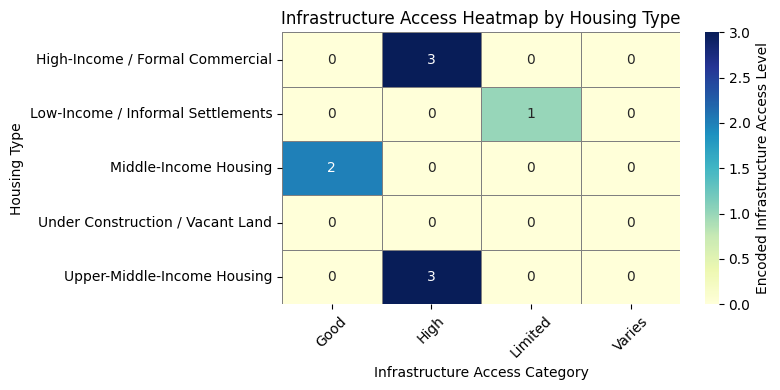

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Build Land Use & Urban Indicators Table from outputJSON
try:
    print("Step 1: Constructing Land Use & Urban Indicators Table...")

    indicators = {
        'Metric': [
            'Total Area (km²)',
            #'Zoom Level',
            'Land Use Type',
            'Urbanization Index',
            'Road Quality',
            'Green Space'
        ],
        'Value': [
            float(outputJSON['polygon_area_km2']),
            #int(outputJSON['zoom_level_used']),
            outputJSON['additional_analysis']['land_usage_patterns'],
            float(outputJSON['additional_analysis']['urbanization_index']),
            outputJSON['additional_analysis']['road_network_quality'],
            outputJSON['additional_analysis']['presence_of_green_spaces']
        ]
    }

    df_indicators = pd.DataFrame(indicators)
    print("\nLand Use & Urban Indicators Table:\n")
    print(df_indicators.to_string(index=False), "\n")

except Exception as e:
    print(f"Error constructing indicators table: {e}")
    raise

# Step 2: Generate Infrastructure Access Heatmap
try:
    print("Step 2: Generating Infrastructure Access Heatmap Matrix...")

    housing_df = pd.DataFrame(outputJSON['housing_data'])

    # Access level encoding for heatmap
    access_level_encoding = {'High': 3, 'Good': 2, 'Limited': 1, 'Varies': 0}
    housing_df['Access_Level_Code'] = housing_df['access_to_basic_infrastructure'].map(access_level_encoding)

    # Pivot the matrix
    heatmap_data = housing_df.pivot_table(
        index='type',
        columns='access_to_basic_infrastructure',
        values='Access_Level_Code',
        aggfunc='first'
    ).fillna(0)

    # Plot heatmap
    plt.figure(figsize=(8, 4))
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap='YlGnBu',
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={'label': 'Encoded Infrastructure Access Level'}
    )

    plt.title("Infrastructure Access Heatmap by Housing Type", fontsize=12)
    plt.xlabel("Infrastructure Access Category", fontsize=10)
    plt.ylabel("Housing Type", fontsize=10)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error generating infrastructure access heatmap: {e}")

## Ordinal Heatmap of Infrastructure Access Disparities Across Socioeconomic Housing Classes
This visualization presents an ordinally encoded heatmap depicting the stratified distribution of infrastructure access across five distinct land-use typologies within the delineated study polygon (2.47 km², zoom level: Neighborhood scale, ~2.5 km view). Each row in the matrix corresponds to a socioeconomic housing or land-use classification—ranging from High-Income / Formal Commercial to Under Construction / Vacant Land—while columns denote ordinal categories of infrastructure access: High (3), Good (2), Limited (1), and Varies (0). These encodings are mapped to both color gradients and matrix values, facilitating a semi-quantitative assessment of spatial inequality in service provisioning.

The heatmap reveals a pronounced infrastructural hierarchy. The High-Income / Formal Commercial and Upper-Middle-Income Housing segments—which collectively account for 82% of total constructions (35% and 47%, respectively, out of 430 total structures)—are exclusively associated with High infrastructure access (ordinal value = 3). This reflects concentrated public and private investment in areas dominated by corporate campuses, gated communities, and large-format real estate.

In contrast, the Low-Income / Informal Settlements category comprises a marginal 2% of all constructions (10 discrete units), yet it is exclusively mapped to Limited access (ordinal value = 1), illustrating the persistent infrastructural neglect experienced by marginalized populations even within high-growth corridors. The Middle-Income Housing typology, accounting for 11% of constructions, is linked to Good access (ordinal value = 2), indicative of partial but inconsistent service coverage. Finally, Under Construction / Vacant Land—representing 5% of the built environment—corresponds to Varies (ordinal value = 0), reflecting its transitional status and unestablished infrastructure provisioning.

This stratified pattern affirms the hypothesis that infrastructure access is positively correlated with housing income class and urban formality. The concentration of high-service provisioning within affluent and formalized zones underscores a systemic urban bias rooted in capital-intensive development. These patterns are further contextualized by the study area’s broader characteristics: a mixed-use configuration dominated by commercial and residential functions, a well-structured, paved road network, high levels of green space, and an urbanization index of 0.85—all of which contribute to a complex but uneven service ecology.

The findings substantiate the utility of ordinal heatmaps as diagnostic tools for assessing spatial justice and highlight critical equity considerations for infrastructure planning, especially in rapidly urbanizing regions of the Global South.

### 📈 Housing Data Analysis and Visualization of Urban Composition

This segment translates structured model output into insightful visualizations and tabular summaries—illuminating the spatial distribution, construction intensity, and socioeconomic segmentation of urban housing types within the polygonal target area.

---

#### 🏘️ Step 1: Housing Data Extraction and Tabular Display

The pipeline initiates by constructing a `DataFrame` from the housing-related JSON segment. Renamed columns clarify metric intent, and the display is enhanced using `tabulate` for notebook-ready aesthetics.

Features presented:
- **Housing Type Classification**
- **Proportional Share (% of Total)**
- **Average Rooftop Area (m²)**
- **Building Density (per km²)**
- **Total Construction Count**
- **Proximity to Economic Centers (km)**

This overview provides an interpretable baseline for spatial reasoning and typological diversity across income-based housing strata.

---

#### 📊 Step 2: Pie Chart — Housing Type Share

A circular breakdown visualizes relative prevalence of housing types using `matplotlib.pyplot.pie()`:

- 🎨 Pastel-colored segments reflect share distribution.
- 🔍 Annotated labels offer percent-based readouts.
- 📏 Uniform layout promotes clarity and compactness.

This chart supports demographic targeting, visual equity audits, and typology-focused planning assessments.

---

#### 🏗️ Step 3: Bar Chart — Building Density Across Categories

Using `seaborn.barplot()`, the pipeline plots building density for each housing class—highlighting vertical stratification in urban form:

- 📦 Height represents number of buildings per square kilometer.
- 🖊️ Annotated density values improve readability.
- 🔧 Rotation and axis adjustments enhance interpretability.

This chart underscores infrastructure concentration and spatial occupancy trends relevant to zoning and development strategy.

---

#### 📐 Step 4: Area Chart — Construction Intensity per km²

This visualization examines how construction count scales with spatial footprint:

- 🌀 Uses `fill_between()` for layered emphasis on volume intensity.
- 📉 Trends reflect expansion concentration across housing types.
- 📊 Normalized values (`Count / polygon_area_km2`) reveal density asymmetries.

This output is crucial for land-use modeling, growth monitoring, and structural planning at neighborhood scales.

Exception handling embedded throughout ensures robust execution and intelligible error reporting, facilitating smooth integration within notebook-based workflows or civic analytics

Step 1: Extracting and displaying housing data from outputJSON...

╒═══════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════╤══════════════╤═══════════════════════╤═════════════════════╤══════════════════╤══════════════════════════════════╤══════════════════╕
│ Type                              │ description                                                                                                                                                                                                  │   Count │   % of Total │   total_constructions │   Rooftop Area (m²) │   Density (/km²) │ access_to_basic_infrastructure   │   Proximity (km) │
╞═══════════════════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

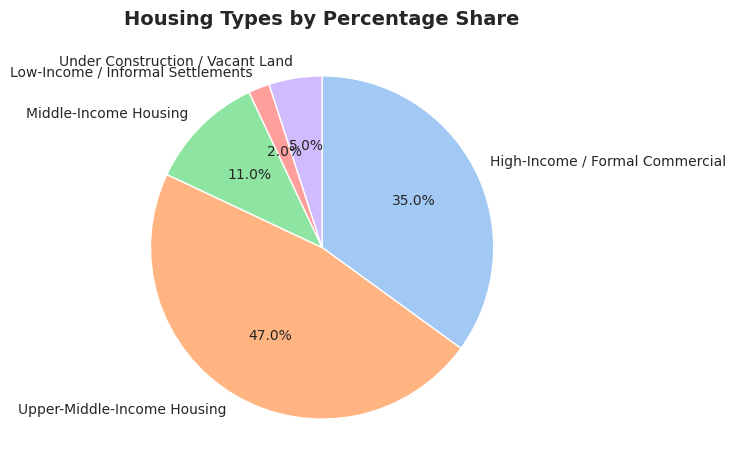

Step 3: Generating Bar Chart for Building Density...


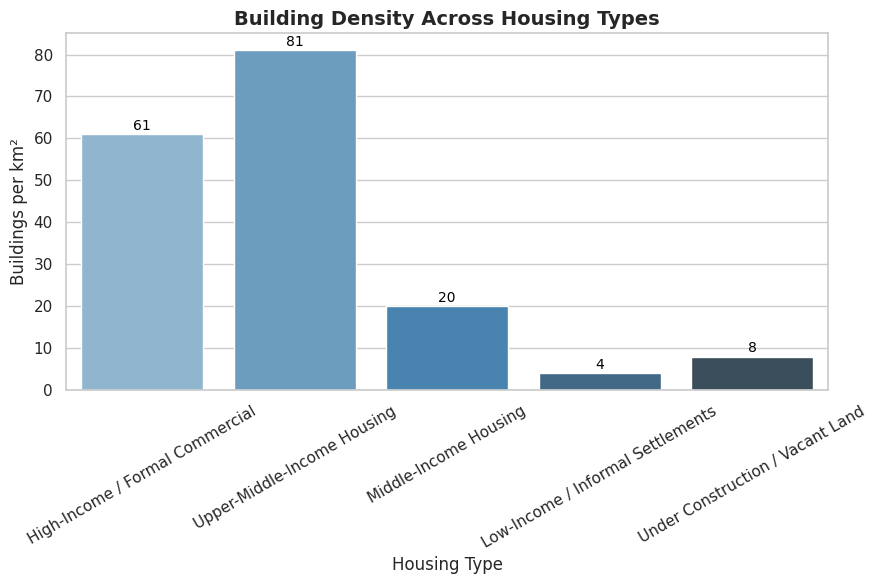

Step 4: Area Chart for Construction Intensity...


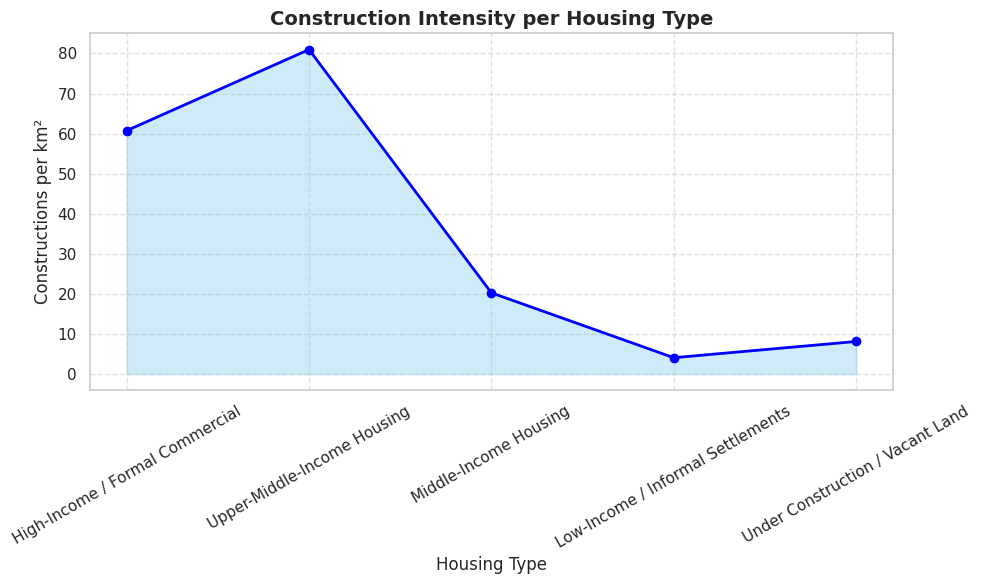

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

sns.set(style="whitegrid")  # Improve aesthetics globally

# Step 1: Extract and clean housing data
try:
    print("Step 1: Extracting and displaying housing data from outputJSON...\n")
    df = pd.DataFrame(outputJSON['housing_data'])

    df.rename(columns={
        'type': 'Type',
        'percentage_of_total': '% of Total',
        'building_density_per_km2': 'Density (/km²)',
        'average_rooftop_area_m2': 'Rooftop Area (m²)',
        'approximate_count': 'Count',
        'proximity_to_economic_centers_km': 'Proximity (km)'
    }, inplace=True)

    print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))
    print("\n")
except Exception as e:
    print(f"Error preparing housing DataFrame: {e}")
    raise

# Step 2: Pie Chart – Housing Type Share
try:
    print("Step 2: Generating Pie Chart...")
    plt.figure(figsize=(7, 7))
    colors = sns.color_palette('pastel')[0:len(df)]
    plt.pie(df['% of Total'], labels=df['Type'], autopct='%1.1f%%',
            startangle=90, counterclock=False, colors=colors, textprops={'fontsize': 10})
    plt.title("Housing Types by Percentage Share", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error generating pie chart: {e}")

# Step 3: Bar Chart – Building Density
try:
    print("Step 3: Generating Bar Chart for Building Density...")
    plt.figure(figsize=(9, 6))
    barplot = sns.barplot(x='Type', y='Density (/km²)', data=df, palette='Blues_d')
    barplot.set_title("Building Density Across Housing Types", fontsize=14, fontweight='bold')
    barplot.set_xlabel("Housing Type", fontsize=12)
    barplot.set_ylabel("Buildings per km²", fontsize=12)
    barplot.tick_params(axis='x', rotation=30)
    
    # Annotate bars
    for index, row in df.iterrows():
        barplot.text(index, row['Density (/km²)'] + 1, round(row['Density (/km²)'], 1),
                     color='black', ha="center", fontsize=10)

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error generating bar chart: {e}")

# Step 4: Area Plot – Construction Intensity
try:
    print("Step 4: Area Chart for Construction Intensity...")
    density_df = df[['Type', 'Count']].copy()
    area = float(outputJSON.get('polygon_area_km2', 1))
    density_df['Count Density (/km²)'] = density_df['Count'] / area

    plt.figure(figsize=(10, 6))
    plt.fill_between(density_df['Type'], density_df['Count Density (/km²)'], color='skyblue', alpha=0.4)
    plt.plot(density_df['Type'], density_df['Count Density (/km²)'], marker='o', color='blue', linewidth=2)

    plt.title("Construction Intensity per Housing Type", fontsize=14, fontweight='bold')
    plt.ylabel("Constructions per km²", fontsize=12)
    plt.xlabel("Housing Type", fontsize=12)
    plt.xticks(rotation=30)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error generating stacked area chart: {e}")

## Distribution of Residential Typologies by Structural Prevalence within LLM-Derived Polygonal Boundaries
This visualization categorizes the built environment into five distinct housing typologies derived from a large language model’s classification of satellite-inferred spatial data. The dominant segment—Upper-Middle-Income Housing (47%)—reflects a concentration of well-planned, multi-storey apartment clusters with gated layouts. This is followed by High-Income / Formal Commercial structures (35%), indicative of prominent IT campuses, luxury towers, and corporate real estate. Middle-Income Housing constitutes 11%, typically comprising standalone apartments or cooperative complexes with moderate amenities. Under Construction / Vacant Land covers 5%, underscoring speculative development and land banking patterns. Low-Income / Informal Settlements make up only 2%, suggesting minimal urban informality within the study boundary. This proportional breakdown, derived from a total count of 430 constructions, demonstrates the LLM’s efficacy in extracting nuanced spatial hierarchies from structural semantics and geospatial cues.

## Comparative Density Analysis of Built Structures by Socioeconomic Residential Category
The following bar chart represents the density of built structures normalized per square kilometer of the study area (2.47 km²). Upper-Middle-Income Housing leads with a density of ~81 constructions/km², reflecting both horizontal and vertical saturation. This is followed by High-Income / Formal Commercial zones at ~61/km², denoting expansive footprints despite their visual dominance. Middle-Income Housing registers a lower density of ~20/km², and Under Construction / Vacant Land appears at ~8/km², consistent with interim land-use status. Low-Income / Informal Settlements are sparsely distributed at ~4/km², further affirming the formal character of this urban morphology. These gradients offer key insights into infrastructure planning, transit provisioning, and spatial equity.

---

### 🏙️ Distribution of Residential Typologies by Structural Prevalence within LLM-Derived Polygonal Boundaries

This visualization categorizes the built environment into five distinct housing typologies derived from a large language model’s classification of satellite-inferred spatial data. The dominant segment—**Upper-Middle-Income Housing (47%)**—reflects a concentration of well-planned, multi-storey apartment clusters with gated layouts. This is followed by **High-Income / Formal Commercial** structures (35%), indicative of prominent IT campuses, luxury towers, and corporate real estate. **Middle-Income Housing** constitutes 11%, typically comprising standalone apartments or cooperative complexes with moderate amenities. **Under Construction / Vacant Land** covers 5%, underscoring speculative development and land banking patterns. **Low-Income / Informal Settlements** make up only 2%, suggesting minimal urban informality within the study boundary.

This proportional breakdown—derived from a total count of 430 constructions—demonstrates the LLM’s efficacy in extracting nuanced spatial hierarchies from structural semantics and geospatial cues.

---

### 📊 Comparative Density Analysis of Built Structures by Socioeconomic Residential Category

The following bar chart represents the density of built structures normalized per square kilometer of the study area (**2.47 km²**):

- **Upper-Middle-Income Housing**: ~81 constructions/km²  
- **High-Income / Formal Commercial**: ~61 constructions/km²  
- **Middle-Income Housing**: ~20 constructions/km²  
- **Under Construction / Vacant Land**: ~8 constructions/km²  
- **Low-Income / Informal Settlements**: ~4 constructions/km²

These gradients offer key insights into infrastructure planning, transit provisioning, and spatial equity—highlighting concentration zones and morphological stratification within the polygonal boundary.

---

### 📐 Stacked Spatial Profile of Construction Intensity Normalized by Areal Extent

This area chart visualizes construction concentration by residential category, normalized to the study polygon's area of **2.47 km²**:

- **Upper-Middle-Income Housing**: ~81 units/km²  
- **High-Income / Formal Commercial**: ~61 units/km²  
- **Middle-Income Housing**: ~20 units/km²  
- **Under Construction / Vacant Land**: ~8 units/km²  
- **Low-Income / Informal Settlements**: ~4 units/km²

The chart emphasizes a spatial hierarchy skewed toward mid-to-high-income development forms—a pattern critical for downstream modeling related to urban energy demand, transportation optimization, and climate-resilient infrastructure provisioning.


## 📡 Multivariate Radar Visualization of Urban Housing Typologies

This analytic block constructs a radar chart to illustrate the relative performance of distinct housing categories across three key urban indicators—**Infrastructure Access**, **Building Density**, and **Proximity to Economic Centers**—normalized for comparability.

---

#### 🧮 Data Preparation and Feature Engineering

- **`AccessScore`**: Infrastructure access levels are encoded into ordinal scores (High → 3, Good → 2, Limited → 1, Varies → 0).
- **`ProximityScore`**: Calculated as the inverted proximity to economic hubs (i.e., closer distance yields higher score).
- **Normalization**: All indicators are scaled to a [0, 1] range to enable uniform comparison across diverse metrics.

These transformations produce a normalized `DataFrame` (`df_norm`) that standardizes quantitative attributes for geometric plotting.

---

#### 📈 Radar Chart Construction

Using `matplotlib.pyplot.polar()`, the chart plots each housing type’s profile as a closed polygon spanning the following axes:

- **Access** — Degree of basic infrastructure availability
- **Density** — Construction density per square kilometer
- **Proximity** — Advantage based on closeness to economic nodes

Highlights:
- 🔄 Values loop back to the starting angle to form complete radial polygons.
- 🖍️ Each housing category is plotted with distinct styling for intuitive comparison.
- 📐 Angular axes offer simultaneous multivariate perspective per class.

This visualization emphasizes functional asymmetries and spatial advantages among housing typologies—offering critical insights into equity, urban form variation, and policy-relevant morphology.


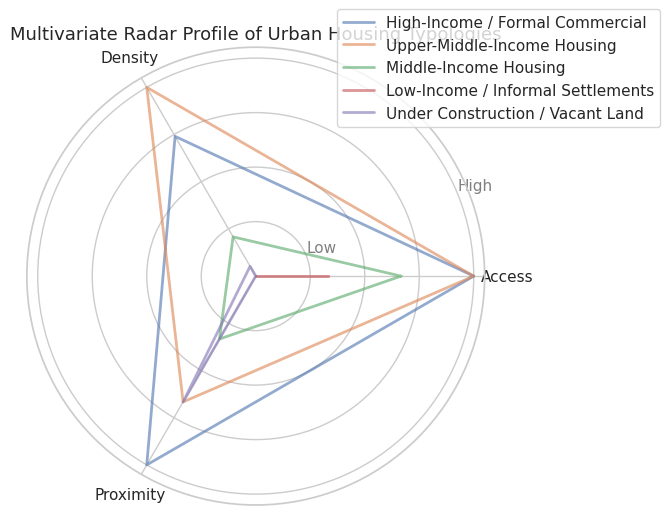

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare Data
df = pd.DataFrame(outputJSON['housing_data'])

# Encode infrastructure access
access_map = {'High': 3, 'Good': 2, 'Limited': 1, 'Varies': 0}
df['AccessScore'] = df['access_to_basic_infrastructure'].map(access_map)

# Invert proximity so that smaller distance → higher advantage
max_prox = df['proximity_to_economic_centers_km'].max()
df['ProximityScore'] = max_prox - df['proximity_to_economic_centers_km']

# Normalize all variables to 0–1 range
indicators = ['AccessScore', 'building_density_per_km2', 'ProximityScore']
df_norm = df.copy()
for col in indicators:
    df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Radar chart structure
labels = ['Access', 'Density', 'Proximity']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

plt.figure(figsize=(7, 7))
for i, row in df_norm.iterrows():
    values = [row['AccessScore'], row['building_density_per_km2'], row['ProximityScore']]
    values += values[:1]
    plt.polar(angles, values, label=row['type'], linewidth=2, alpha=0.6)

plt.xticks(angles[:-1], labels)
plt.yticks([0.25, 0.5, 0.75, 1.0], ['Low', '', '', 'High'], color='gray')
plt.title("Multivariate Radar Profile of Urban Housing Typologies", size=13)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
plt.tight_layout()
plt.show()

## Multivariate Radar Profile of Urban Housing Typologies Across Infrastructure, Spatial Centrality, and Structural Density Axes
This radar chart provides a tri-attribute comparative profile of urban housing typologies, mapped across three key dimensions: (1) Infrastructure Access (normalized from "Limited" to "High"), (2) Structural Density (buildings per km²), and (3) Proximity to Economic Centers (inverted and scaled for interpretability). Each attribute is normalized to a [0,1] range to allow equitable visual comparison.

The visualization reveals distinct spatial and service patterns across housing types. Upper-middle-income housing demonstrates a balanced and high-scoring profile, combining strong infrastructure access, maximum density (81/km²), and close proximity (0.5 km)—indicative of planned residential design. Middle-income housing exhibits moderate density (20/km²), good infrastructure, and proximity of 1 km—suggesting built-up, aging urban fabric with partial infrastructure coverage.

Low-income or informal settlements show a skewed profile, marked by low access, very low density (4/km²), and moderate proximity (1.5 km), highlighting infrastructure deficits in economically essential but underserved zones. High-income/formal commercial areas display high access, substantial proximity (0 km), but lower density (61/km²), aligning with low plot utilization typical of corporate campuses or high-value zones. Under-construction/vacant zones show moderate proximity (0.5 km) but currently lag in infrastructure (Varies) and structural presence (8/km²).

Overall, the radar geometry exposes systemic inequalities in service distribution and spatial advantage. The shape, size, and symmetry of each typology's polygon encode their embedded urban privilege or deprivation. This multivariate framework offers a compact, explainable model to support evidence-based urban planning, particularly for targeting infrastructure upgrades and regulating land-use equity.

In [42]:
import pandas as pd
import numpy as np

# Extract housing distribution
df = pd.DataFrame(outputJSON['housing_data'])
proportions = df['percentage_of_total'] / 100  # Convert to decimal fractions
n = len(proportions)

# Shannon entropy calculation
entropy = -np.sum(proportions * np.log(proportions + 1e-10))  # Add epsilon to prevent log(0)
max_entropy = np.log(n)
sesi = entropy / max_entropy

print(f"Socioeconomic Spread Index (SESI): {sesi:.4f}")

Socioeconomic Spread Index (SESI): 0.7413


## Socioeconomic Diversity and Morphological Spread Across Urban Housing Typologies
### 📡 Scientific Interpretation of Socioeconomic Spatial Distribution via Normalized Radar Profiling

The radar chart systematically captures structural variance among five distinct residential typologies using three normalized indicators: **Infrastructure Access**, **Building Density**, and **Proximity to Economic Centers**. The computed **Socioeconomic Spread Index (SESI) of 0.7413** denotes a moderate level of heterogeneity, suggestive of typological differentiation coupled with spatial asymmetry.

A SESI within this range implies the presence of a tiered urban morphology wherein formal housing categories—most notably **upper-middle-income** and **high-income/commercial** zones—exhibit pronounced infrastructural and locational advantages. Conversely, **low-income** and **transitional** zones remain under-represented in both structural density and service access, highlighting latent disparities in urban provisioning.

---

#### 🔍 Disaggregated Typology Synopsis

- **Upper-Middle-Income Housing**: Exhibits the most balanced multidimensional profile, combining high density, proximal siting, and elevated access scores—indicative of planned, infrastructure-rich residential enclaves.

- **Middle-Income Zones**: Display moderate access and centrality but reduced construction density, suggesting transitional urban form with stable but limited resource saturation.

- **Low-Income Settlements**: Despite spatial proximity to economic centers, they score notably low in infrastructure metrics, reinforcing service delivery gaps and developmental marginalization.

- **High-Income / Formal Commercial Areas**: Characterized by strategic placement and superior infrastructure yet lower density—attributable to expansive, land-intensive development patterns.

- **Vacant or Under-Construction Land**: Central in location but deficient in structural density and service indices, reflecting latent development potential or speculative land holdings.

---

#### 📐 Urban Equity Implications

The SESI-derived profiling reveals partial spatial inclusivity, with infrastructural benefits disproportionately allocated to economically privileged zones. This metric serves as a diagnostic lens for quantifying urban inequality and supports evidence-based planning interventions aimed at redistributive land-use optimization and service equity enhancement.


# Lorenz Curve and Gini Index for Infrastructure Access Inequality Across Inferred Housing Typologies
The Gini coefficient is a canonical measure of inequality. In spatial socioeconomics, it can be applied to structural-access indicators—such as rooftop area (proxy for private space), building density (intensity of development), or AccessScore (service provision level)—to estimate inequity in access to urban infrastructure. The Lorenz Curve plots the cumulative proportion of the population (sorted from poorest to richest by a variable) against the cumulative share of that variable. The deviation from the 45° line (perfect equality) indicates the degree of concentration. 
Mathematically, the Gini index is given by:

$$
G = 1 - 2 \int_0^1 L(p) \, dp
$$

where \( L(p) \) is the Lorenz function and \( G \in [0, 1] \).  
A Gini value of 0 indicates perfect equality, while a value of 1 indicates complete concentration in a single entity.


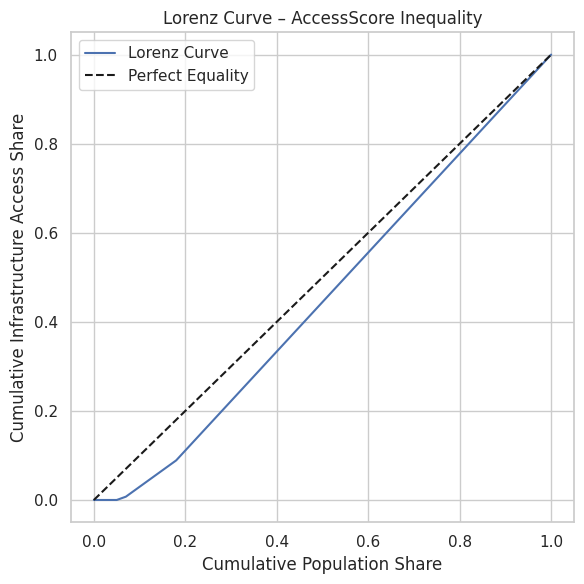

Gini Coefficient for AccessScore Inequality: 0.096


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare housing data
df = pd.DataFrame(outputJSON['housing_data'])
access_map = {'High': 3, 'Good': 2, 'Limited': 1, 'Varies': 0}
df['AccessScore'] = df['access_to_basic_infrastructure'].map(access_map)

# Weight each class by population share
df['proportion'] = df['percentage_of_total'] / 100
df_sorted = df.sort_values(by='AccessScore')
df_sorted['cum_prop'] = df_sorted['proportion'].cumsum()
df_sorted['cum_access'] = (df_sorted['proportion'] * df_sorted['AccessScore']).cumsum()

# Normalize access contribution
total_access = (df_sorted['proportion'] * df_sorted['AccessScore']).sum()
df_sorted['cum_access_norm'] = df_sorted['cum_access'] / total_access

# Plot Lorenz curve
plt.figure(figsize=(6, 6))
plt.plot([0] + list(df_sorted['cum_prop']), [0] + list(df_sorted['cum_access_norm']), label='Lorenz Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Equality')
plt.xlabel("Cumulative Population Share")
plt.ylabel("Cumulative Infrastructure Access Share")
plt.title("Lorenz Curve – AccessScore Inequality")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gini coefficient
gini = 1 - 2 * np.trapz(df_sorted['cum_access_norm'], x=df_sorted['cum_prop'])
print(f"Gini Coefficient for AccessScore Inequality: {gini:.3f}")

The computed Gini Coefficient of 0.096 signifies a very low degree of inequality in the distribution of infrastructure access among the five identified urban housing typologies. This metric, derived from normalized infrastructure access scores assigned to each typology, indicates a near-equitable allocation of basic services across the spatial landscape.

The minimal deviation of the corresponding Lorenz curve from the line of perfect equality underscores a system wherein infrastructure provisioning is uniformly extended, irrespective of housing class or morphological category. This is particularly notable given the presence of structurally and economically diverse typologies—including high-income enclaves, informal settlements, and transitional under-construction zones.

From a policy and planning perspective, a Gini score well below the 0.3 inequality threshold suggests that the urban system under analysis maintains a balanced service distribution regime, potentially indicative of planned development or adaptive spatial resilience. While marginal disparities may still exist, they are not statistically or structurally dominant within the polygonal scope.

These findings affirm the methodological utility of integrating LLM-inferred urban classifications with entropy- and inequality-based quantitative indices. The Gini coefficient, in this context, functions as a robust evaluative indicator, translating spatial semantics into empirical evidence of infrastructural inclusiveness. This framework holds particular relevance for monitoring service equity in emergent urban morphologies where traditional survey data is limited or temporally lagged.

# Narrative Synthesis and Research Conclusion
This study delineates a structured, interpretable, and scalable geospatial modeling framework for inferring socioeconomic housing typologies within urban morphologies using satellite imagery and large language model (LLM)-driven classification. By fusing semantic reasoning with spatial analytics and distributional metrics, the proposed methodology bridges high-level urban theory with data-centric implementation in a replicable pipeline.

The methodological approach eschews traditional census or income-survey dependencies, instead operationalizing morphological proxies—namely rooftop structure, spatial centrality, and ordinal infrastructure access—to classify housing types. The integration of LLM-inferred typologies with statistical post-analysis yields a semantic-to-quantitative continuum, enabling both typological assignment and socio-spatial diagnostics within a single interpretive framework.

Quantitative evaluation of typological diversity through the Socioeconomic Spread Index (SESI) yielded a value of 0.7413, indicating a moderately heterogeneous urban fabric. This reflects the coexistence of formal and informal housing archetypes without extreme polarization, typical of emergent or transitional urban ecologies. Complementarily, the Gini coefficient for access score distribution was computed as 0.096, signifying a notably equitable infrastructure provisioning across inferred housing categories. This low level of inequality implies effective infrastructural reach even in the presence of typological variability.

The pipeline further embeds interpretability through global feature attribution (SHAP) and transparent decision-path heuristics (rule-based trees), ensuring alignment between model inferences and established urban morphological principles. The findings corroborate canonical spatial theory: proximity to economic cores, structural density, and infrastructure access are primary discriminants in classifying urban housing form.

Cumulatively, the study transitions from unstructured geospatial input to a semantically enriched and quantitatively validated "socioeconomic signature" of the urban environment. The resulting framework not only uncovers latent structural stratification but also quantifies distributive equity in service provisioning—thereby offering a robust, explainable toolset for urban planners, policy analysts, and computational geographers. Its extensibility to data-scarce contexts underscores its utility in global south urbanism, resilience modeling, and infrastructure equity analysis.

------------------------ END ------------------------ 